# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

print("The number of datapoints is: {}".format(auto_numeric.shape[0]))
print("The number of attributes is: {}".format(auto_numeric.shape[1]))


The number of datapoints is: 159
The number of attributes is: 16


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [3]:
# Your code goes here
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [4]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

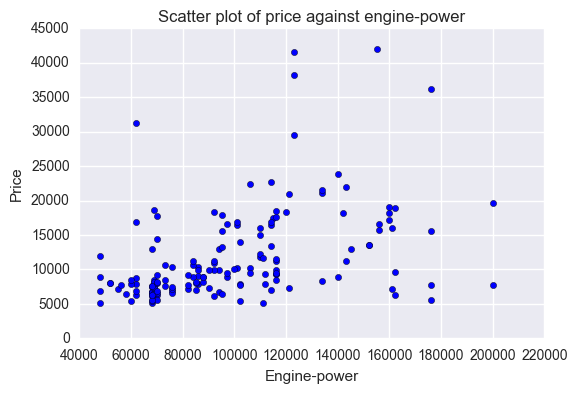

In [5]:
# Your code goes here
plt.scatter(auto_numeric['engine-power'], auto_numeric['price'])
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.title('Scatter plot of price against engine-power')
plt.show()

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

As shown in the plot, it seems that there exists somehow linearity between engine-power and price because with the increase of engine power, the price increases. Also, some points seem like outliers, for example, the points in the top of the plot stand far away from other points.


### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

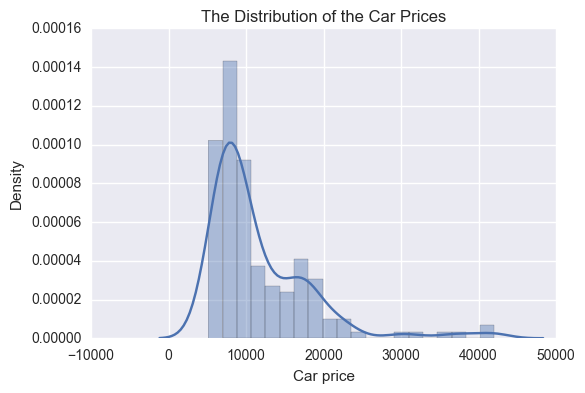

In [6]:
# Your code goes here

sns.distplot(auto_numeric.price,bins = 20)

plt.xlabel('Car price')
plt.ylabel('Density')
plt.title('The Distribution of the Car Prices')

plt.show()


### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*

Firstly, I will remove the outliers of the datasets for the reason that linear regression is very sensitive to outliers ans the extreme outliers will cause an inappropriate coefficient and intercept in the linear regression model. Also, by normalizing the variable, we could reduce the influence of outliers, which is another method to do preprocess.


### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [7]:
# Your code goes here
X = auto_numeric['engine-power'].as_matrix()
y = auto_numeric['price'].as_matrix()

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [8]:
# Your code goes here

X = X.reshape((X.shape[0],1))
print("The shape of new X is: {}".format(X.shape)) 


The shape of new X is: (159, 1)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
# Your code goes here
#X = auto_numeric.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2)

print("The shpe of X_train is: {}".format(X_train.shape))
print("The shpe of X_test is: {}".format(X_test.shape))
print("The shpe of y_train is: {}".format(y_train.shape))
print("The shpe of y_test is: {}".format(y_test.shape))

The shpe of X_train is: (127, 1)
The shpe of X_test is: (32, 1)
The shpe of y_train is: (127,)
The shpe of y_test is: (32,)


### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [10]:
# Your code goes here
lr = LinearRegression(normalize = True)
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [11]:
# Your code goes here

print("The equation for predicting the price of a car given the engine-power is that:")
print("Price = {0:.5f} * X(engine-power) + {1:.5f}".format(lr.coef_[0],lr.intercept_))


The equation for predicting the price of a car given the engine-power is that:
Price = 0.09318 * X(engine-power) + 2729.01459


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*

From the above question, we could see the coefficient is around 0.08 which has the magnitude of 10^(-2). However, though the magnitude is very small, we can't tell that engine-power isn't an influential variable since we don't know the cofficient of other attributes. To evaluate its importance, we should compare with other attributes.


### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

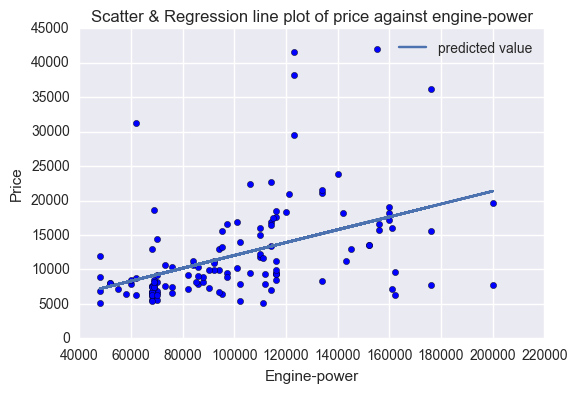

In [12]:
# Your code goes here
#x_ep = np.linspace(50000., 220000., 1000)
#p = lr.coef_[0] * x_ep + lr.intercept_
plt.scatter(X_train, y_train)
#plt.plot(x_ep,p,label='predicted value by equation',color = 'g')
plt.plot(X_train,lr.predict(X_train),label='predicted value')
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter & Regression line plot of price against engine-power')
plt.show()


### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*

Using hold-out validation, especially on small datasets, the redressor could be significantly different depending on how the division is made. In this case, by excuting the question 1.10 several times, and I could get completely different coefficient in question 1.12.



### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [13]:
# Your code goes here
kf = KFold(auto_numeric.shape[0], n_folds = 5, shuffle = True, random_state = 0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [14]:
# Your code goes here
#print(auto_numeric.loc[2])
foldno = 1
for train_index, test_index in kf:
    X_train_kf = auto_numeric.loc[train_index]
    mean_value = X_train_kf.describe().loc['mean','price']
    print("The mean value of the price variable of fold {0} is: {1:.5f}".format(foldno,mean_value))
    foldno += 1

The mean value of the price variable of fold 1 is: 11853.26772
The mean value of the price variable of fold 2 is: 11635.97638
The mean value of the price variable of fold 3 is: 11689.87402
The mean value of the price variable of fold 4 is: 11709.82677
The mean value of the price variable of fold 5 is: 11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [15]:
# Your code goes here
cvlr = LinearRegression()
cv_result = cross_val_predict(cvlr,X,y,kf)
print("The shape of the prediction is: {}".format(cv_result.shape))

The shape of the prediction is: (159,)


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [16]:
# Your code goes here

'''
R2 = 1-((((y-cv_result)**2).sum())/(((y-y.mean())**2).sum()))
RMSE = np.sqrt((((cv_result-y)**2).sum())/y.shape[0])
MAE = np.abs(cv_result-y).sum()/y.shape[0]
CC = np.corrcoef(cv_result,y)
'''
print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y,cv_result)))

print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y,cv_result))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y,cv_result)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(cv_result,y)))

The Coefficient of Determination (R^2) is: 0.17301
The Root Mean Squared Error (RMSE) is: 6114.45212
The Mean Absolute Error (MAE) is: 3987.95780
The Correlation Coefficient (CC) is: 
[[ 1.         0.4171222]
 [ 0.4171222  1.       ]]


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*

The above metrics show the distance between predicted value and true value. From the metrics, we could see that the distance is large and the CC gets only around 0.4. The reason of this may realate to the outlier in the datasets which make the regressor perfoems worse.

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

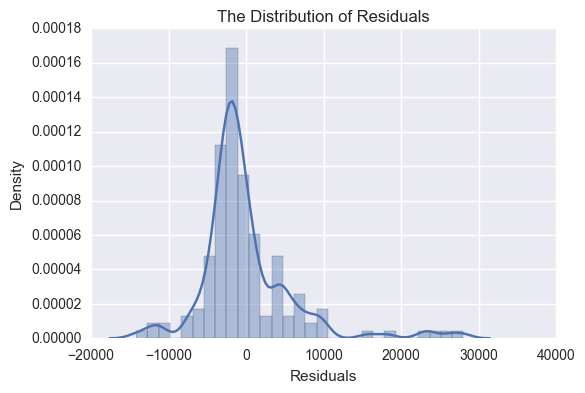

In [17]:
# Your code goes here

residuals = y - cv_result

sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('The Distribution of Residuals')

plt.show()

*Your answer goes here*

From the plot, we could see the distribution isn't centered at 0(somewhat less than 0), which meets what is shown from metrics. This means we don't train a good regressor(relate to outliers). If the regressor works well, the distribution will center at aroung 0.


### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [18]:
# Your code goes here

data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

X_base = auto_base['engine-power']
y_base = auto_base['price']
X_base = X_base.reshape((X_base.shape[0],1))

lr_base = LinearRegression(normalize=True)

result_base = cross_val_predict(lr_base,X_base,y_base,kf)

print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y_base,result_base)))

print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y_base,result_base))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y_base,result_base)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(result_base,y_base)))

The Coefficient of Determination (R^2) is: -0.00214
The Root Mean Squared Error (RMSE) is: 6730.84360
The Mean Absolute Error (MAE) is: 4901.86096
The Correlation Coefficient (CC) is: 
[[ 1.         -0.06191442]
 [-0.06191442  1.        ]]


### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

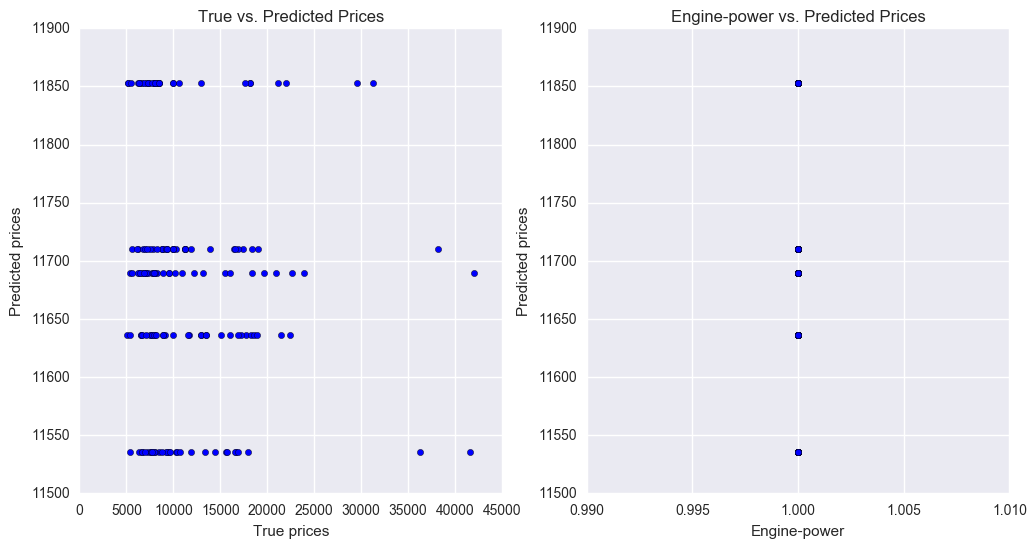

In [19]:
# Your code goes here
plt.figure(figsize=(12,6))

plt.subplot(121)
#plt.scatter(y,cv_result)
plt.scatter(y_base,result_base)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('True vs. Predicted Prices')

plt.subplot(122)
#plt.scatter(X,cv_result)
plt.scatter(X_base,result_base)
plt.xlabel('Engine-power')
plt.ylabel('Predicted prices')
plt.title('Engine-power vs. Predicted Prices')

plt.show()

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

I think the simplest baseline model could be the average value of the target variable. The model I just trained is reasonable though it perfoms really bad because it gives the average values of different data fold. From the plot, we could see that the regressor generate 5 values(from 5 folds of data) and these values represent the baseline model in this case (average value).


### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [20]:
# Your code goes here
print(auto_base.describe())
print('The values contained in engine-power: {}'.format(auto_base['engine-power'].unique()))

       engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000
The values contained in engine-power: [ 1.]


*Your answer goes here*

From the statistics of the auto_base dataset, we could see that engine-power = 1, which means engine-power will not cause any influence on regression process and the model just generate the average value of the data.Thus, this model performs so poorly.



## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

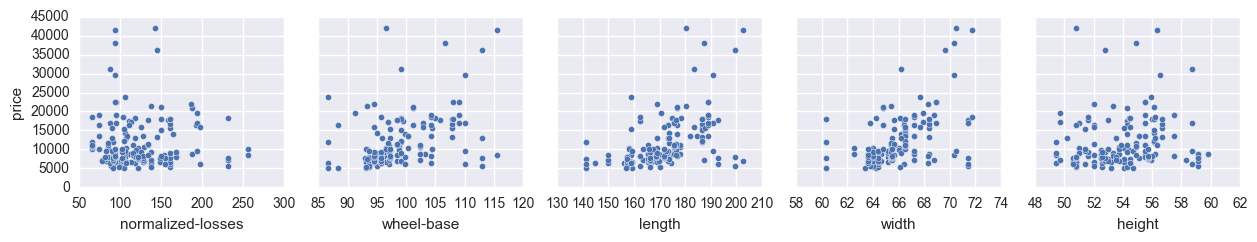

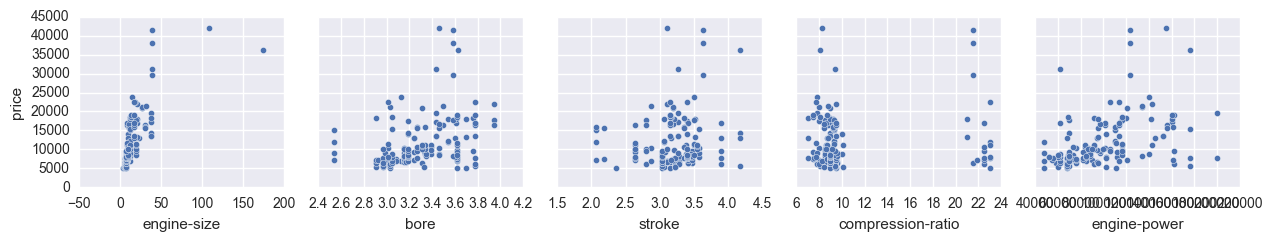

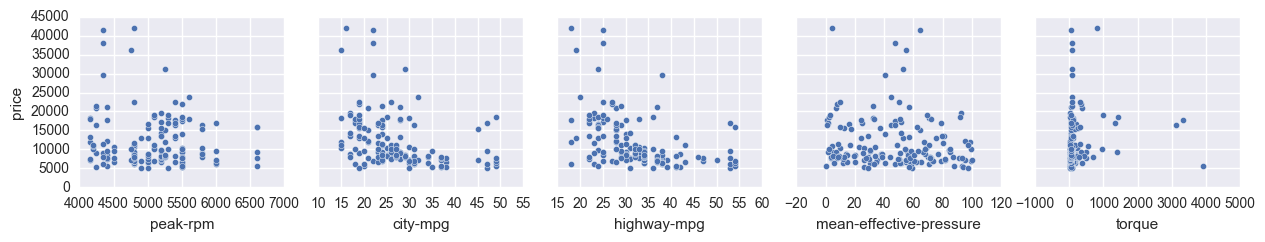

In [21]:
# Your code goes here
sns.pairplot(data=auto_numeric,x_vars=['normalized-losses','wheel-base','length','width','height'],y_vars='price')
sns.pairplot(data=auto_numeric,x_vars=['engine-size','bore','stroke','compression-ratio','engine-power'],y_vars='price')
sns.pairplot(data=auto_numeric,x_vars=['peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque'],y_vars='price')
plt.show()

*Your answer goes here*

From the plots, I could generate:

Useless attributes: torque, compression-ration

Influential attributes: engine-size, length

The attributes I think could be removed safely are torque and compression-ratio because they don't show any linearity against with price.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [22]:
# Your code goes here
X_mlr = auto_numeric.drop('price',axis=1)
y_mlr = auto_numeric['price']

mlr = LinearRegression(normalize = True)
result_mlr = cross_val_predict(mlr,X_mlr,y_mlr,kf)


### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [23]:
# Your code goes here
print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y_mlr,result_mlr)))

print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y_mlr,result_mlr))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y_mlr,result_mlr)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(result_mlr,y_mlr)))


The Coefficient of Determination (R^2) is: 0.48614
The Root Mean Squared Error (RMSE) is: 4819.80464
The Mean Absolute Error (MAE) is: 3050.34460
The Correlation Coefficient (CC) is: 
[[ 1.          0.74256027]
 [ 0.74256027  1.        ]]


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*

Comparing with the metrics in Question1.19, this model gets higher R^2 and CC, which means that the attributes in this model are more influential and easier to make prediction. As for RMSE and MAE, the lower RMSE and MAE in this model means that the regressor fits the data very well so that the distance between the predicted value and target is small.


### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

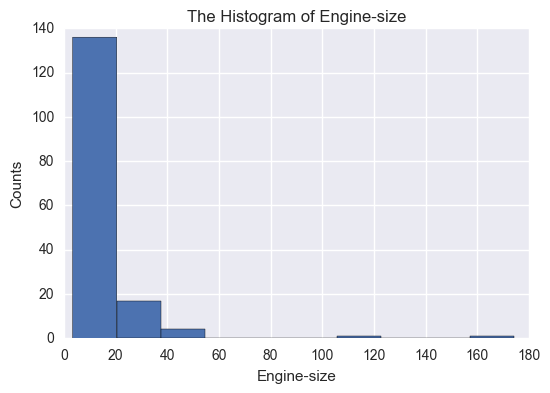

In [24]:
# Your code goes here

plt.hist(auto_numeric['engine-size'],bins=10)
plt.xlabel('Engine-size')
plt.ylabel('Counts')
plt.title('The Histogram of Engine-size')

plt.show()

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*

The distribution of this attribute isn't like a normal distribution. Since the normality of variables could generate a more stable solution, it's better to normalize the variables. In this case, I could see that the outliers are obvious and they will finally cause a high error in regressor.

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

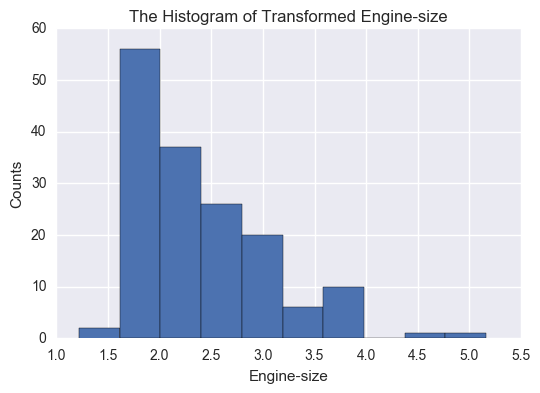

In [25]:
# Your code goes here
import math
auto_numeric['engine-size']=np.log(auto_numeric['engine-size'])

plt.hist(auto_numeric['engine-size'],bins=10)
plt.xlabel('Engine-size')
plt.ylabel('Counts')
plt.title('The Histogram of Transformed Engine-size')

plt.show()


### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [26]:
# Your code goes here
X_nmlr = auto_numeric.drop('price',axis=1)
y_nmlr = auto_numeric['price']

new_mlr = LinearRegression(normalize = True)
result_nmlr = cross_val_predict(new_mlr,X_nmlr,y_nmlr,kf)

print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y_nmlr,result_nmlr)))

print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y_nmlr,result_nmlr))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y_nmlr,result_nmlr)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(result_nmlr,y_nmlr)))


The Coefficient of Determination (R^2) is: 0.68961
The Root Mean Squared Error (RMSE) is: 3745.91960
The Mean Absolute Error (MAE) is: 2668.36430
The Correlation Coefficient (CC) is: 
[[ 1.          0.83167532]
 [ 0.83167532  1.        ]]


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*

Yes! From the metrics, we could say thay the performance of this model is very good. I think this is because the log transformation(I choose the log transformation in Question2.7) reduce the influence of the outliers and makes the variables easier to fit.

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [27]:
pd.set_option('max_columns', 30)

In [28]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')

print("The number of samples in the dataset is: {}".format(auto_full.shape[0]))
print("The number of attributes in the dataset is: {}".format(auto_full.shape[1]))
auto_full.head(20)

The number of samples in the dataset is: 159
The number of attributes in the dataset is: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*

Here are the attributes I think are categorical: 
make,fuel-type,spiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling

Because the nominal attributes are not numeric in sometimes and also it's hard to find the linear relationship between these attributes, it's useless in their current form for the purposes of regression. If we want to use it for regression, we need to transform them.

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [29]:
# Your code goes here

categorical_attributes = ['make','fuel-type','aspiration','num-of-doors',
                          'body-style','drive-wheels','engine-location',
                          'engine-type','num-of-cylinders','fuel-system','symboling']

auto_full_edit = auto_full.copy(True)
y_enc = auto_full_edit['price']
auto_full_edit = auto_full_edit.drop('price',axis = 1)
for item in categorical_attributes:
    le = LabelEncoder()
    le.fit(auto_full_edit[item])
    auto_full_edit[item] = le.transform(auto_full_edit[item])
#    print(item,'  ',le.classes_,' ',le.classes_.shape[0])
    
mark = np.array([1,2,3,4,5,6,7,12,13,15,23])

ohc = OneHotEncoder(categorical_features = mark,n_values = 'auto')
ohc.fit(auto_full_edit)
X_enc = ohc.transform(auto_full_edit).toarray()

print("The dimensionality of the transformed attributes is: {}".format(X_enc.shape))

The dimensionality of the transformed attributes is: (159, 70)


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [30]:
# Your code goes here
tmlr = LinearRegression(normalize = True)
result_tmlr = cross_val_predict(tmlr,X_enc,y_enc,kf)

#print(tmlr.coef_,'   ',tmlr.intercept_)

print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y_enc,result_tmlr)))
print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y_enc,result_tmlr))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y_enc,result_tmlr)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(result_tmlr,y_enc)))

#Question here: should we remove the price column? Since this is not mentioned in the Question description...
#Get competely different result...


The Coefficient of Determination (R^2) is: -26566043046495126896508928.00000
The Root Mean Squared Error (RMSE) is: 34655296086057908.00000
The Mean Absolute Error (MAE) is: 4928648582750197.00000
The Correlation Coefficient (CC) is: 
[[ 1.          0.04168909]
 [ 0.04168909  1.        ]]


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

Comparing with the previous results, this complex model performs very poorly. And I think the reason of this is that there are too many norminal attributes in the datasets, which makes the regressor hard to fit(because they are non-linerity). The advantage of using more complex model is that we could make the use of more information to generate the correct results. And the disadvantage of complex is that the large complexity need enough data to fit the model, if we don't have enough data, we may even get a worse result.


### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [31]:
# Your code goes here

dt = DecisionTreeRegressor()
result_dt = cross_val_predict(dt,X_enc,y_enc,kf)

print("The Coefficient of Determination (R^2) is: {:.5f}".format(r2_score(y_enc,result_dt)))

print("The Root Mean Squared Error (RMSE) is: {:.5f}".format(np.sqrt(mean_squared_error(y_enc,result_dt))))

print("The Mean Absolute Error (MAE) is: {:.5f}".format(mean_absolute_error(y_enc,result_dt)))

print("The Correlation Coefficient (CC) is: \n{}".format(np.corrcoef(result_dt,y_enc)))


The Coefficient of Determination (R^2) is: 0.64891
The Root Mean Squared Error (RMSE) is: 3983.96935
The Mean Absolute Error (MAE) is: 2449.28302
The Correlation Coefficient (CC) is: 
[[ 1.          0.82406792]
 [ 0.82406792  1.        ]]


*Your answer goes here*

The performance of DecisionTreeRegressor improves a lot. And I think the reason of this is that there are a great number of norminal attributes in the datasets so that it's easier to make a decision tree.